In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('heart.csv')
df.head(3)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  40.0   M           ATA        140          289          0     Normal   
1  49.0   F           NAP        160          180          0     Normal   
2  37.0   M           ATA        130          283          0         ST   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0

In [3]:
df.isna().sum()

Age               4
Sex               3
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.shape

(918, 12)

In [5]:
#Removing null values from age column
df['Age'].fillna(np.mean(df['Age']), inplace=True)

In [6]:
#Removing null values from Sex column
gender_count = df['Sex'].value_counts()
gender_count

M    723
F    192
Name: Sex, dtype: int64

In [7]:
df['Sex'].fillna('M', inplace = True)

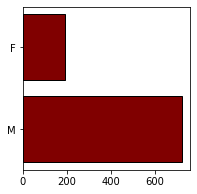

In [8]:
fig = plt.figure(figsize=(3,3))
plt.barh(gender_count.index, gender_count.values, color = 'Maroon', edgecolor = 'Black')
plt.show()

In [9]:
chestpains = df.ChestPainType.value_counts()

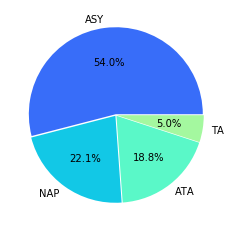

In [10]:
sns.set_palette('rainbow')
plt.pie(chestpains.values, labels=chestpains.index, autopct="%0.1f%%", explode=[0.01,0.01,0.01,0.01])
plt.show()

In [11]:
df.groupby('HeartDisease')['Cholesterol'].mean()

HeartDisease
0    227.121951
1    175.940945
Name: Cholesterol, dtype: float64

In [12]:
df.groupby('HeartDisease')['RestingBP'].mean()

HeartDisease
0    130.180488
1    134.185039
Name: RestingBP, dtype: float64

In [13]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

In [14]:
encode = LabelEncoder()
df['Sex'] = encode.fit_transform(df['Sex'])
df.ChestPainType = encode.fit_transform(df.ChestPainType)
df.RestingECG = encode.fit_transform(df.RestingECG)
df.ExerciseAngina = encode.fit_transform(df.ExerciseAngina)
df.ST_Slope = encode.fit_transform(df.ST_Slope)

In [15]:
X = df.iloc[: , :-1]
y = df.HeartDisease

In [16]:
x_tr, x_te, y_tr, y_te = train_test_split(X,y,test_size=0.20)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(x_tr, y_tr)

C:\Users\Nitin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [19]:
y_pr = model.predict(x_te)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("The accuracy is:", accuracy_score(y_te, y_pr)*100)

The accuracy is: 86.41304347826086


In [21]:
confusion_matrix(y_te, y_pr)

array([[74,  9],
       [16, 85]], dtype=int64)

In [22]:
#Appying Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

In [23]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12]
accuracies = []

In [24]:
for i in depth:
    model = DecisionTreeClassifier(criterion="entropy",max_depth=i)
    model.fit(x_tr, y_tr)
    y_pr = model.predict(x_te)
    accuracies.append(accuracy_score(y_te, y_pr)*100)

In [25]:
for i in range(len(depth)):
    print(f"Accuracy of decision tree with depth {depth[i]} is {accuracies[i]}")

Accuracy of decision tree with depth 1 is 84.23913043478261
Accuracy of decision tree with depth 2 is 84.23913043478261
Accuracy of decision tree with depth 3 is 82.6086956521739
Accuracy of decision tree with depth 4 is 79.8913043478261
Accuracy of decision tree with depth 5 is 80.97826086956522
Accuracy of decision tree with depth 6 is 80.97826086956522
Accuracy of decision tree with depth 7 is 80.43478260869566
Accuracy of decision tree with depth 8 is 80.43478260869566
Accuracy of decision tree with depth 9 is 81.52173913043478
Accuracy of decision tree with depth 10 is 78.26086956521739
Accuracy of decision tree with depth 11 is 78.80434782608695
Accuracy of decision tree with depth 12 is 77.71739130434783


In [26]:
depth = [1,2,3,4,5,6,7,8,9,10,11,12]
accuracies = []
for i in depth:
    model = DecisionTreeClassifier(criterion="gini",max_depth=i)
    model.fit(x_tr, y_tr)
    y_pr = model.predict(x_te)
    accuracies.append(accuracy_score(y_te, y_pr)*100)

In [27]:
for i in range(len(depth)):
    print(f"Accuracy of decision tree with depth {depth[i]} is {accuracies[i]}")

Accuracy of decision tree with depth 1 is 84.23913043478261
Accuracy of decision tree with depth 2 is 84.23913043478261
Accuracy of decision tree with depth 3 is 82.6086956521739
Accuracy of decision tree with depth 4 is 80.97826086956522
Accuracy of decision tree with depth 5 is 80.43478260869566
Accuracy of decision tree with depth 6 is 81.52173913043478
Accuracy of decision tree with depth 7 is 82.6086956521739
Accuracy of decision tree with depth 8 is 80.97826086956522
Accuracy of decision tree with depth 9 is 79.34782608695652
Accuracy of decision tree with depth 10 is 77.17391304347827
Accuracy of decision tree with depth 11 is 77.71739130434783
Accuracy of decision tree with depth 12 is 78.80434782608695


# Applying KNN Algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
k_vals = [1,2,3,4,5,6,7,8,9,10]
accus = []
for i in k_vals:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_tr, y_tr)
    y_pred = model.predict(x_te)
    accus.append(accuracy_score(y_te, y_pred)*100)

In [30]:
accus

[62.5,
 63.04347826086957,
 66.30434782608695,
 65.76086956521739,
 65.76086956521739,
 68.47826086956522,
 64.67391304347827,
 63.58695652173913,
 66.30434782608695,
 65.76086956521739]

In [31]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te, y_pred)*100

70.1086956521739

## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
model = GaussianNB()
model.fit(x_tr, y_tr)
y_pred = model.predict(x_te)
accuracy_score(y_te, y_pred)*100

86.95652173913044